In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data import make_rectangle, insert_shape, plot_data
from agent import Agent
from optim import cas_train_cbf
from utils import plot_cbf

%load_ext autoreload
%autoreload 2

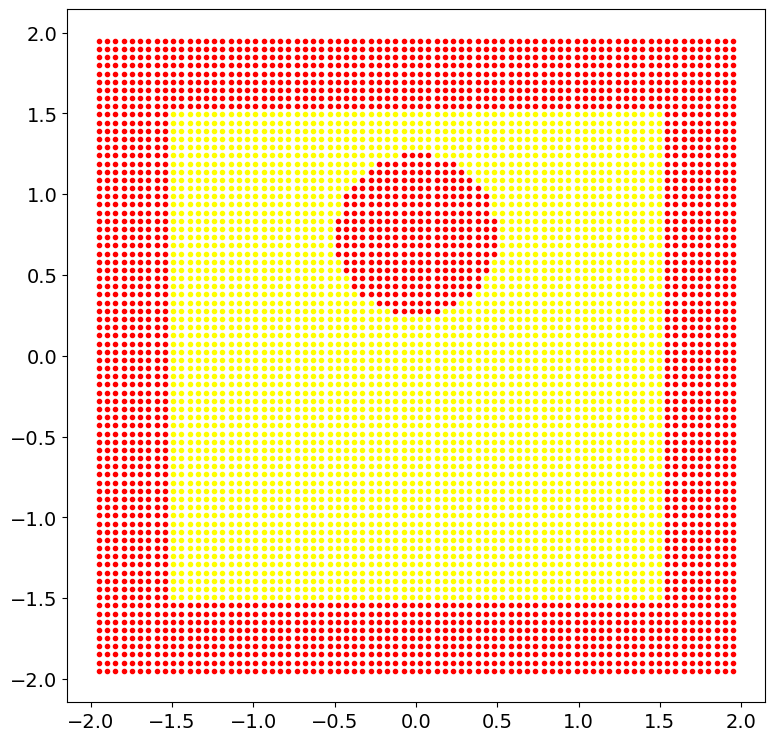

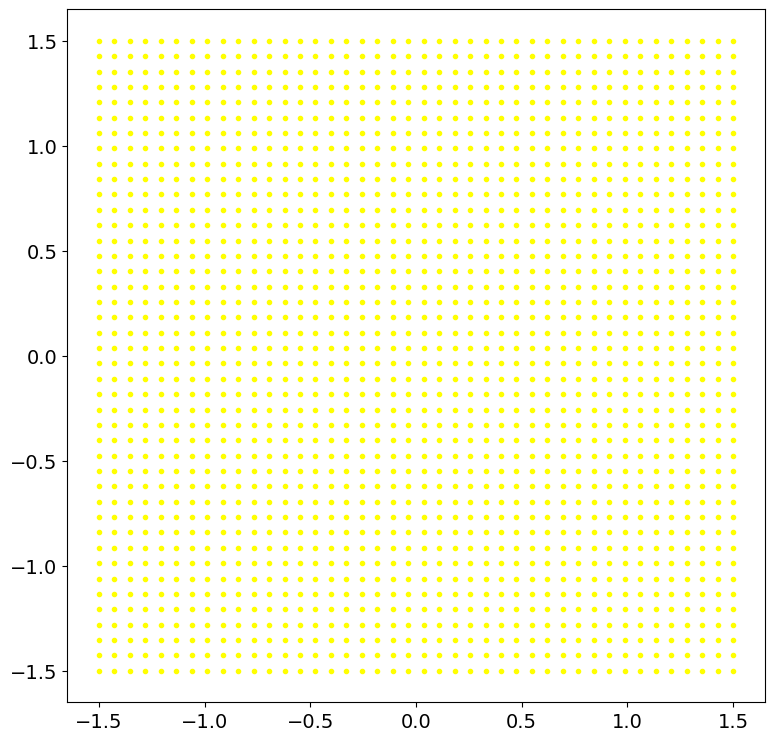

In [3]:
width=3
grid, obs_dict = make_rectangle(height=width, width=width, density=400, unsafe_margin=0.3, center=(0,0))
#obs_dict = insert_shape(np.array([-0.2, 2.3]), grid, obs_dict, shape='triangle', scale=3.2, theta=-np.pi/8)
obs_dict = insert_shape(np.array([0, 0.75]), grid, obs_dict, shape='circle', scale=0.5, theta=0)
c_grid, c_obs_dict= make_rectangle(height=width, width=width, density=200, unsafe_margin=0  , center=(0,0))
plot_data(grid, obs_dict)
plot_data(c_grid, c_obs_dict)

In [4]:
a = Agent((0, 0), grid, obs_dict, width=width, sensor_radius=1)

scan_safe, scan_unsafe = a.scan()
rx = 1.5
samples  = a.sample(rx)

if scan_unsafe.shape[0] != 0:
    x_unsafe = np.vstack((scan_unsafe, samples))
else: 
    x_unsafe = samples

n_safe = scan_safe.shape[0]
x_buffer, x_safe = a.make_buffer(scan_safe, int(0.2 * n_safe), 0.50)

rc = 1
C = []
for x in c_grid:
    if np.linalg.norm(x - a.pos) <= rc:
        C.append(x)
C = np.array(C)
a.centers.append(C)

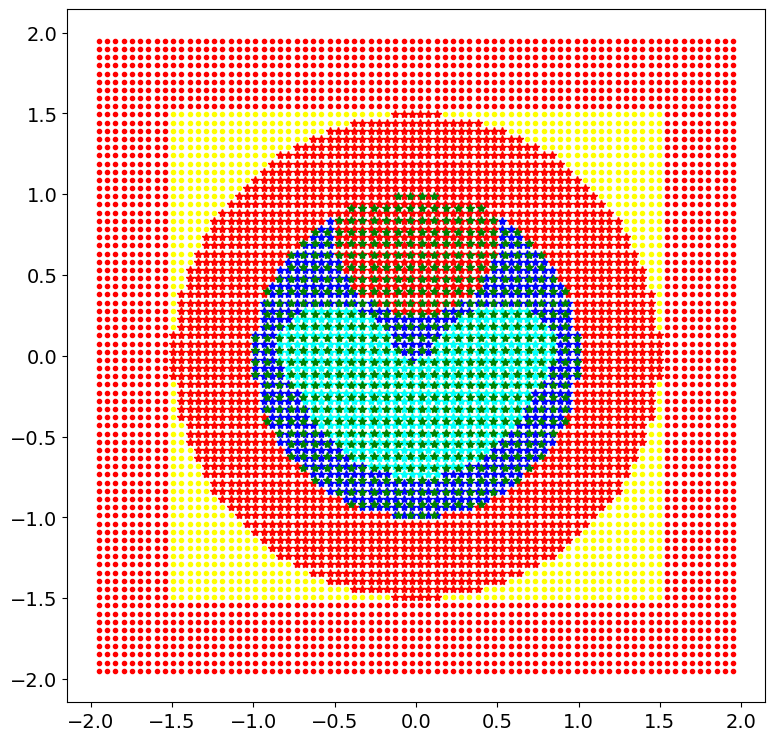

In [5]:
plot_data(grid, obs_dict, [(x_safe  , "cyan"), 
                           (x_buffer, "blue"), 
                           (x_unsafe, "red"),
                           (C       , "green")])

In [6]:
theta_max=10
max_elem =100
gamma_safe=0.3
gamma_unsafe=-0.3
gamma_dyn=0.1
theta=cas_train_cbf(x_safe, x_buffer, x_unsafe, C, theta_max, max_elem, rx, rc, gamma_safe, gamma_unsafe, gamma_dyn)
a.thetas.append(theta)

1.3443213901444846
CasADi - 2024-03-24 16:25:37 MESSAGE("nlp::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-24 16:25:37 MESSAGE("nlp::init") [.../casadi/core/x_function.hpp:327]
CasADi - 2024-03-24 16:25:37 MESSAGE("nlp::init") [.../casadi/core/mx_function.cpp:113]
CasADi - 2024-03-24 16:25:37 MESSAGE("Using live variables: work array is 7 instead of 25867") [.../casadi/core/mx_function.cpp:326]
CasADi - 2024-03-24 16:25:38 MESSAGE("solver::init") [.../casadi/core/function_internal.cpp:547]
CasADi - 2024-03-24 16:25:40 MESSAGE("solver::create_function nlp_grad:[x, p, lam:f, lam:g]->[f, g, grad:gamma:x, grad:gamma:p]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-24 16:25:53 MESSAGE("solver::create_function nlp_f:[x, p]->[f]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-24 16:25:53 MESSAGE("solver::create_function nlp_g:[x, p]->[g]") [.../casadi/core/oracle_function.cpp:219]
CasADi - 2024-03-24 16:25:54 MESSAGE("solver::create_function 

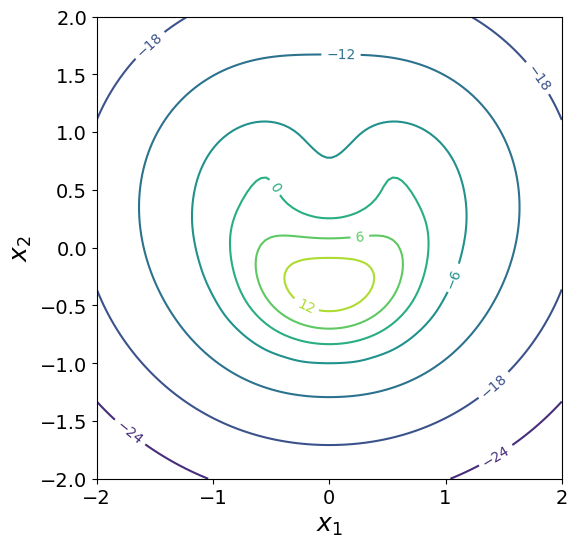

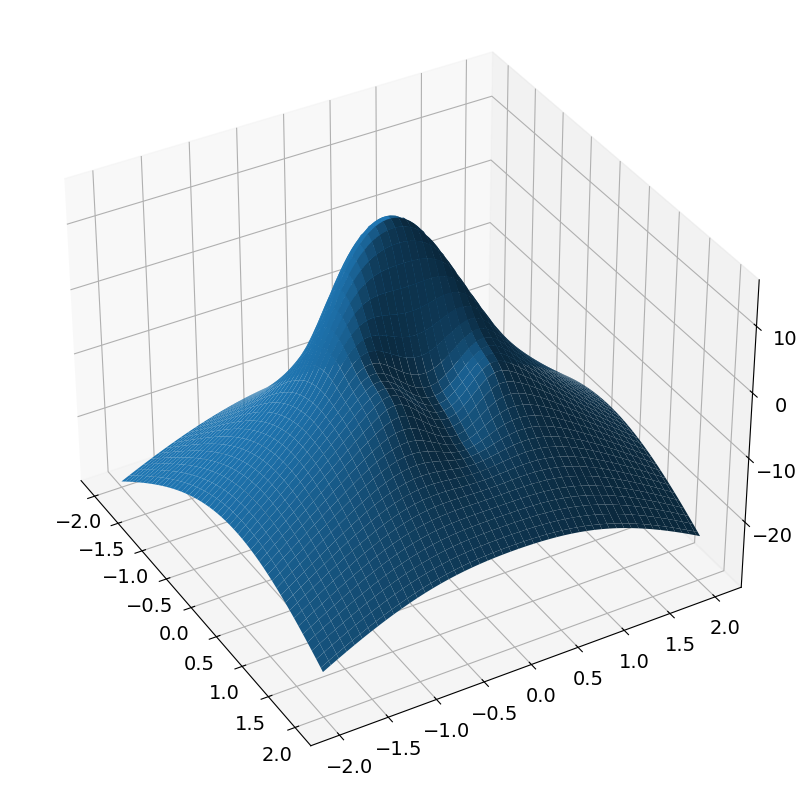

In [7]:
plot_cbf(a.width, a.thetas, a.centers)

In [8]:
pos = 0
neg = 0
for elem in theta:
    if elem < 0:
        neg += elem
    else:
        pos += elem
print(neg/pos)

-1.089108718699237


position is [0 0]
h is [9.03256768]
start time is 0
traj
 [[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.28904187e-06]
 [0.00000000e+00 2.51781678e-05]
 [0.00000000e+00 2.53940297e-04]
 [0.00000000e+00 2.52879389e-03]
 [0.00000000e+00 2.41345705e-02]
 [0.00000000e+00 1.44211132e-01]
 [0.00000000e+00 1.80162336e-01]
 [0.00000000e+00 2.24321354e-01]
 [0.00000000e+00 2.50672919e-01]]


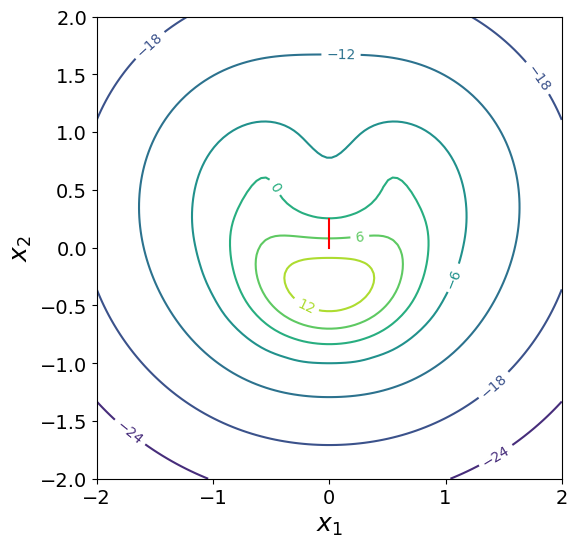

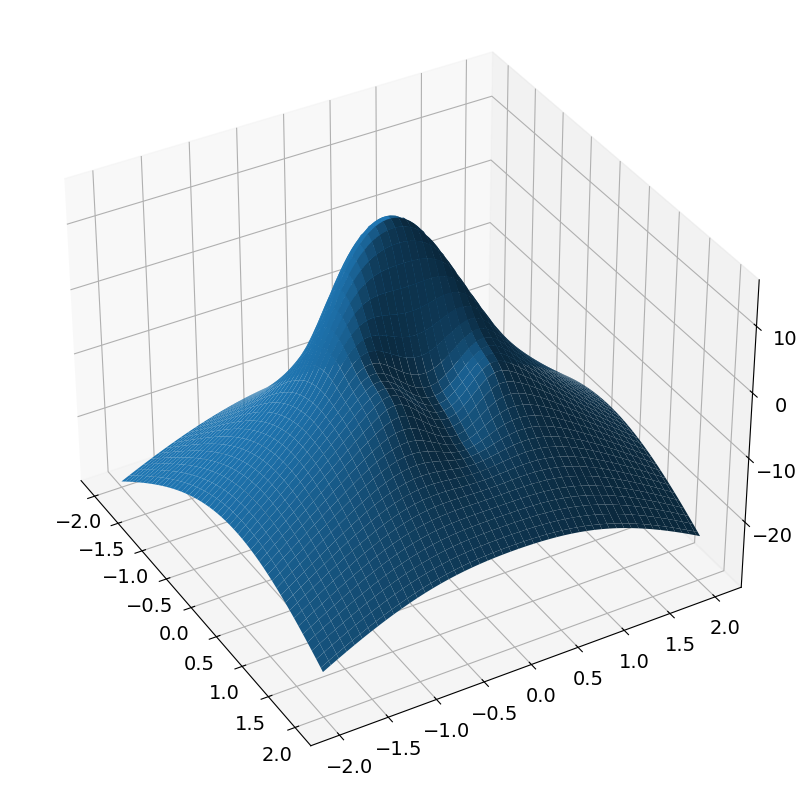

new position is [0.         0.25067292]
h is now [0.1]
new time is 100
position is [0.         0.25067292]
h is [0.1]
start time is 100
traj
 [[0.         0.25067292]
 [0.         0.25067292]]


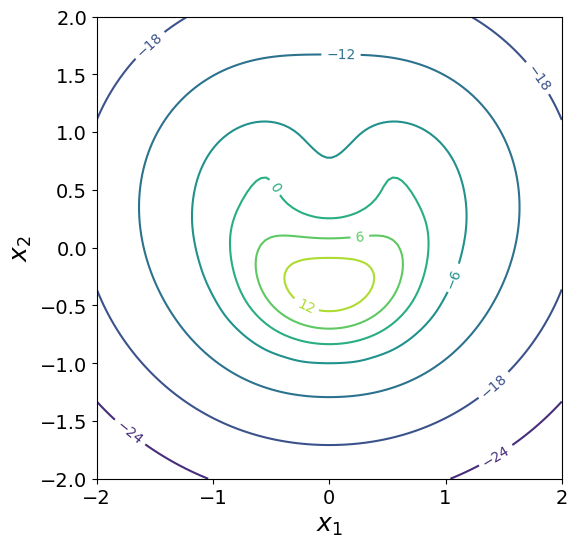

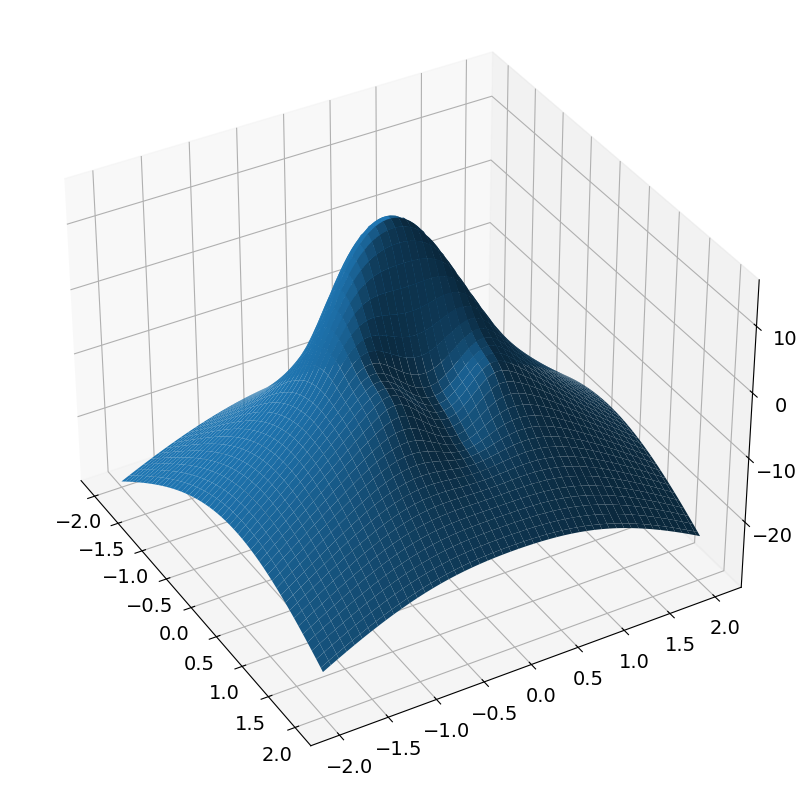

new position is [0.         0.25067292]
h is now [0.1]
new time is 200
position is [0.         0.25067292]
h is [0.1]
start time is 200
traj
 [[0.         0.25067292]
 [0.         0.25067292]]


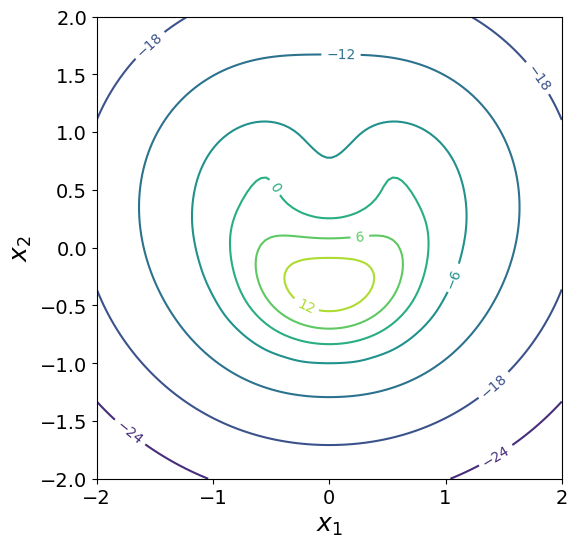

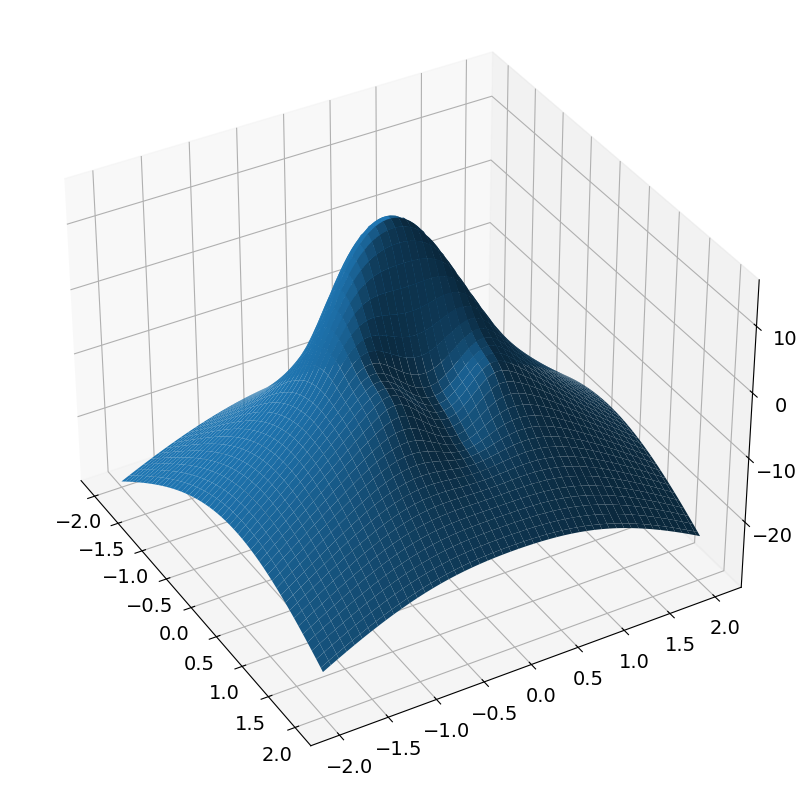

new position is [0.         0.25067292]
h is now [0.1]
new time is 300


In [9]:
a.pos = np.array([0, 0])
a.t   = 0
for i in range(3):
    a.goto(np.array([0, 6.66]), tend=100)